# 一、資料匯入

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
421,北投區,34.79,160.25,153697,3,2,2,14.47,0,2,104,106,2463.0,0,0,0,0,1,0,0,0,0,0,0,0
377,中山區,2.83,31.01,96743,0,1,1,0.00,0,33,73,106,300.0,1,0,0,0,0,0,0,0,0,0,0,0
270,士林區,8.59,28.88,65789,0,0,0,0.00,0,22,84,106,190.0,0,0,0,0,0,0,1,0,0,0,0,0
244,士林區,141.00,189.96,321120,4,2,2,0.00,0,45,61,106,6100.0,0,0,0,0,0,0,1,0,0,0,0,0
216,中山區,2.83,31.01,104805,1,1,1,0.00,0,33,73,106,325.0,1,0,0,0,0,0,0,0,0,0,0,0


# 二、建模前預處理

## 切分訓練及測試資料

In [11]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
402,97.50
285,21.58
336,192.24
216,31.01
488,250.85


## 標準化

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [13]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)
print(X_train_poly[:5])

[[ 1.         -0.30303164  0.09182818]
 [ 1.         -1.02747882  1.05571273]
 [ 1.          0.60100057  0.36120169]
 [ 1.         -0.93749546  0.87889773]
 [ 1.          1.1602715   1.34622996]]


# KNNRegressor (assign k)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
#n_neighbors:找鄰近的幾個鄰居
#weight:uniform:最近k個鄰居的權重一樣來決定類別
#weight:distance:最近k個鄰居的權重根據距離成反比來決定類別
knnr = KNeighborsRegressor(n_neighbors=4,weights='uniform') # or weight='distance'
knnr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((knnr.predict(X_test_std) - y_test) ** 2) )
print("R Square:",knnr.score(X_test_std, y_test))

MSE: 1478856.93
R Square: 0.7369043872329026


## 畫決策邊界

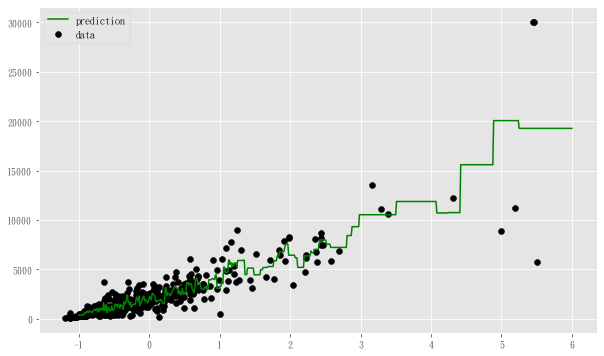

In [15]:
T = np.linspace(-1, 6, 600).reshape(-1,1) #reshape成二維矩陣

plt.figure(figsize=(10,6))
plt.scatter(X_train_std, y_train['總價元'], c='k', label='data')
plt.plot(T, knnr.predict(T), c='g', label='prediction')
plt.legend()
plt.show()

## 校調k值

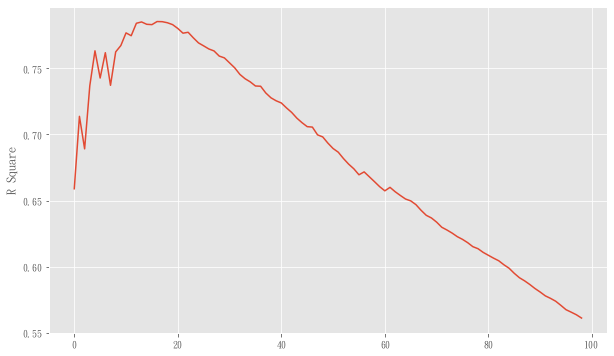

In [16]:
score_list=[]
for i in range(1,100):
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(X_train_std, y_train)
    score_list.append(knnr.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('R Square')
plt.plot(score_list)